# Praca domowa 7
Autor : Bartosz Sawicki


In [2]:
from IPython.display import Image # wyświetlanie zdjęć

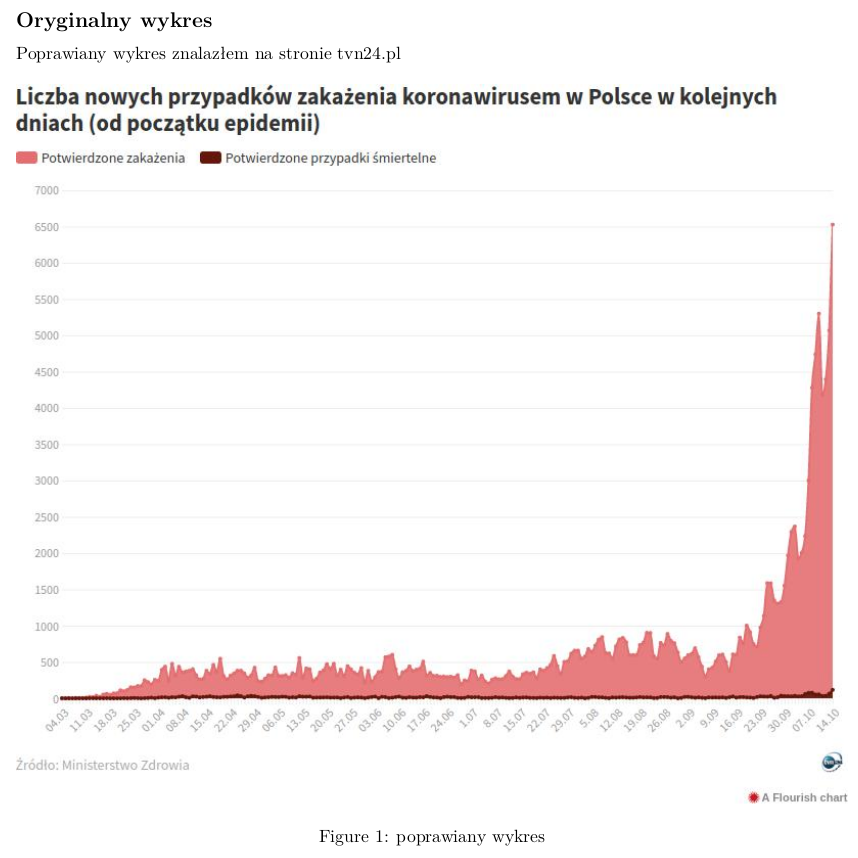

In [3]:
Image(filename = "wykres_tvn.png")

Źródło : https://tvn24.pl/polska/koronawirus-w-polsce-mapa-zakazen-dzisiaj-statystyki-najnowsze-dane-14-pazdziernika-2020-4344739

## Pierwsza poprawka (wykonana w `ggplot`)

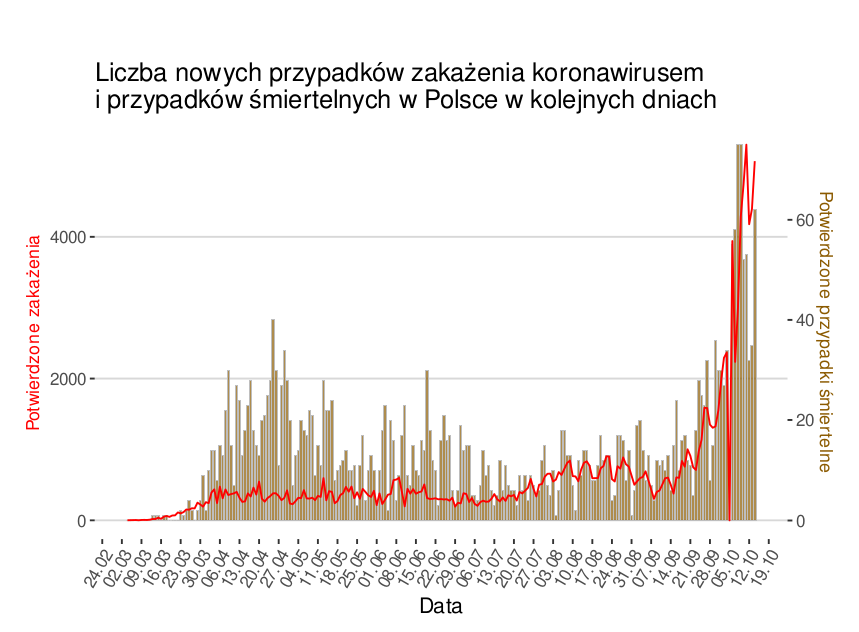

In [4]:
Image(filename = "poprawka_v1.png")

## Poprawka wykonana w `matplotlib` + `seaborn`

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("darkgrid")

covid_data = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv") # pobieranie danych

In [6]:
# filtrowanie danych
poland_data = covid_data[covid_data.location == "Poland"].reset_index()[["date","new_cases","new_deaths"]] 
poland_data['date'] = poland_data['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
poland_data_dates = poland_data[poland_data.date > datetime(2020,2,24)].reset_index()
poland_data_dates = poland_data_dates[ poland_data_dates.date < datetime(2020,10,14)].reset_index()

# ustawienie formatu daty
poland_data_dates['date'] = poland_data_dates['date'].apply(lambda x: x.strftime('%d.%m'))

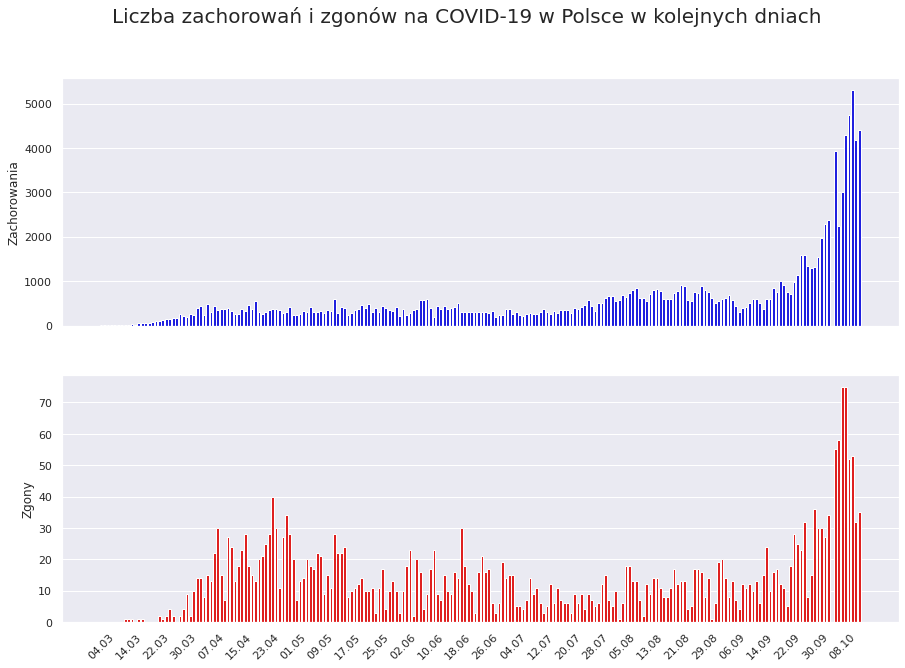

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

sns.barplot(data = poland_data_dates, x = 'date', y = 'new_cases', ax = ax1, color = "blue")
sns.barplot(data = poland_data_dates, x = 'date', y = 'new_deaths', ax = ax2, color = "red")

f.suptitle("Liczba zachorowań i zgonów na COVID-19 w Polsce w kolejnych dniach", fontsize=20)

ax1.set_ylabel('Zachorowania')
ax1.set_xlabel('')
ax2.set_ylabel('Zgony')
ax2.set_xlabel('')
plt.locator_params(axis = 'x', nbins=30)
plt.xticks(rotation=45)

plt.show()

Zastosowałem się do sugestii do pracy domowej 2 i rozdzieliłem wykres na 2 podwykresy. Widać teraz lepiej która skala odnosi się zachorowań a która do zgonów. Możemy też  odczytać liczby zgonów dokładniej niż na oryginalnym wykresie.